Using device: cpu
Epoch 1/5 - Loss: 0.3415 - Accuracy: 94.77%
Epoch 2/5 - Loss: 0.1435 - Accuracy: 96.27%
Epoch 3/5 - Loss: 0.0971 - Accuracy: 96.96%
Epoch 4/5 - Loss: 0.0731 - Accuracy: 97.23%
Epoch 5/5 - Loss: 0.0578 - Accuracy: 97.11%


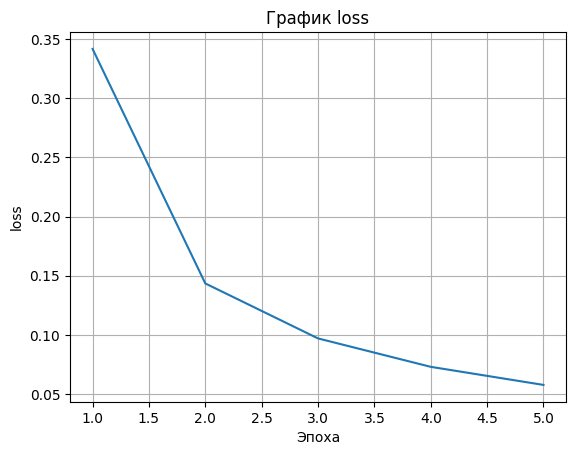

In [2]:
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt
y=[]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset = datasets.MNIST(root='./data',train=False,download=True,transform=transform)
train_loader = DataLoader(dataset=train_dataset,batch_size=64,shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=1000, shuffle=False)
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
).to(device)
loss_f = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=0.001)
EPOCHS = 5
for epoch in range(EPOCHS):
    total_loss = 0
    model.train()
    for images,labels in train_loader:
        images,labels=images.to(device),labels.to(device)
        optim.zero_grad()
        outputs = model(images)
        loss = loss_f(outputs,labels)
        loss.backward()
        optim.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    model.eval()
    total,correct=0,0
    with torch.no_grad():
        for images,labels in test_loader:
             images,labels=images.to(device),labels.to(device)
             outputs = model(images)
             pred = torch.argmax(outputs,dim=1)
             correct += (pred == labels).sum().item()
             total += labels.size(0)
    accuracy = correct / total * 100
    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.2f}%")
    y.append(avg_loss)
plt.plot(range(1,6),y)
plt.title('График loss')
plt.xlabel('Эпоха')
plt.ylabel('loss')
plt.grid(True)
plt.savefig('loss_fn.png')
torch.save(model,'model_full.pth')